<class 'numpy.ndarray'>
[9.99963075e-01 1.66569102e-05 1.65198350e-05 1.31296534e-06
 1.27860140e-06 5.86802142e-07 1.57218439e-07 5.15776184e-08
 4.41077549e-08 4.40458755e-08 4.04502068e-08 2.95652673e-08
 2.55257788e-08 2.44173629e-08 2.32093032e-08 1.79856621e-08
 1.74650695e-08 1.73847716e-08 1.35693952e-08 1.32477938e-08
 1.30564640e-08 1.30045793e-08 1.20812277e-08 1.20122384e-08]


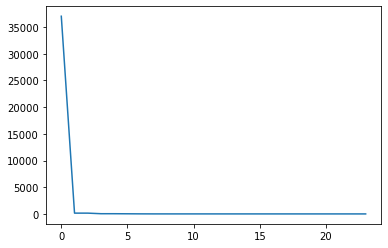

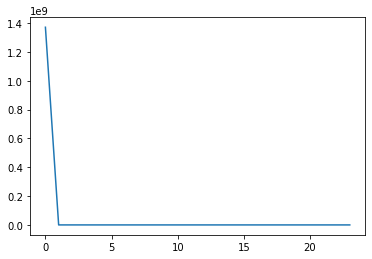

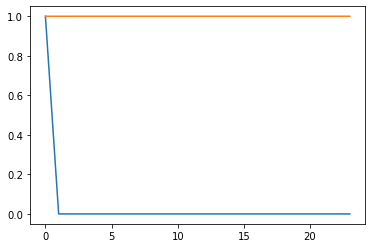

In [5]:
import numpy as np
from pySingularSpectrumAnalysis import SingularSpectrumAnalysis

from statsmodels.datasets import co2
import matplotlib.pyplot as plt

data = co2.load(True).data
data = data.resample('M').mean().ffill()
data = data.values.flatten()[10:]

print(type(data))
ssa = SingularSpectrumAnalysis(L=24)
comps = ssa.decomposition(data)

plt.figure(1)
plt.plot(ssa.sigma)
plt.figure(2)
plt.plot(ssa.eigenvalue)
plt.figure(3)
plt.plot(ssa.contri)
plt.plot(ssa.cum_contri)
print(ssa.contri)

0
2.4101609596982598e-11


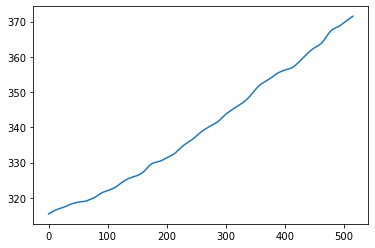

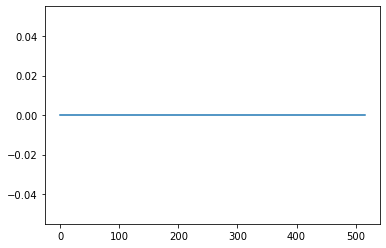

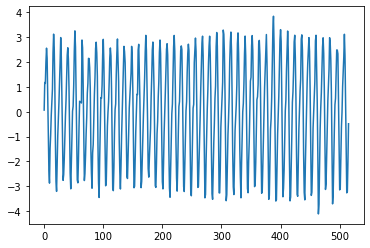

In [2]:
recombie, periodic_end_ind = ssa.trend_periodic_recombine()
print(periodic_end_ind)

for i in range(3):
    plt.figure(i)
    plt.plot(recombie[:, i])
    
print(np.sum(np.abs(data - np.sum(recombie, axis=1))))